In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfeffort = pd.DataFrame.from_csv('effort.csv')
dfweather = pd.DataFrame.from_csv('weather.csv')
dfdrought = pd.DataFrame.from_csv('drought.csv')
dfheavyPrecip = pd.DataFrame.from_csv('heavy-precip.csv')
dfprecip = pd.DataFrame.from_csv('precipitation.csv')
dftemperature = pd.DataFrame.from_csv('temperature.csv')
dfbald_eagle = pd.DataFrame.from_csv('bald_eagle_counts.csv')
dfchickadee = pd.DataFrame.from_csv('chickadee_counts.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that som

In [10]:
dfbald_eagle = dfbald_eagle[dfbald_eagle.year > 1980]
dfbald_eagle = dfbald_eagle[dfbald_eagle.year < 2016]
Y_bald_eagle = np.array(dfbald_eagle.density.tolist())
Y_bald_eagle_dict = dict()
for i in range(len(dfbald_eagle)):
    Y_bald_eagle_dict[dfbald_eagle.iloc[i].year] = dfbald_eagle.iloc[i].density

print(len(Y_bald_eagle), len(Y_bald_eagle_dict),Y_bald_eagle, Y_bald_eagle_dict)

35 35 [0.007  0.0074 0.0317 0.0147 0.0076 0.0342 0.0394 0.0224 0.0156 0.0282
 0.0197 0.0286 0.0272 0.0403 0.0407 0.0359 0.0479 0.0464 0.041  0.0459
 0.0468 0.0387 0.0533 0.0719 0.0699 0.1466 0.143  0.0969 0.1238 0.1489
 0.1961 0.1265 0.0824 0.0981 0.0747] {1981: 0.007, 1982: 0.0074, 1983: 0.0317, 1984: 0.0147, 1985: 0.0076, 1986: 0.0342, 1987: 0.0394, 1988: 0.0224, 1989: 0.0156, 1990: 0.0282, 1991: 0.0197, 1992: 0.0286, 1993: 0.0272, 1994: 0.0403, 1995: 0.0407, 1996: 0.0359, 1997: 0.0479, 1998: 0.0464, 1999: 0.041, 2000: 0.0459, 2001: 0.0468, 2002: 0.0387, 2003: 0.0533, 2004: 0.0719, 2005: 0.0699, 2006: 0.1466, 2007: 0.143, 2008: 0.0969, 2009: 0.1238, 2010: 0.1489, 2011: 0.1961, 2012: 0.1265, 2013: 0.0824, 2014: 0.0981, 2015: 0.0747}


In [5]:
def build_features(year_):
    X = []
    
    def lmap(func, alist):
        return list(map(func, alist))
        
    temp_row = dftemperature[dftemperature.year == year_]
    X = X + lmap(float, [temp_row.earth_surface])#,temp_row.lower_troposphere_uah, temp_row.lower_troposphere_rss]
    drought_row = dfdrought[dfdrought.year == year_]
    X = X + lmap(float, [drought_row.annual_avg, drought_row.nine_yr_avg])
    hprecip_row = dfheavyPrecip[dfheavyPrecip.year == year_]
    X = X + lmap(float, [hprecip_row.index_value, hprecip_row.nine_yr_avg])
    precip_row = dfprecip[dfprecip.year == year_]
    X = X + lmap(float, [precip_row.anomoly_inches])
    return np.array(X)
    

In [14]:
X_dict = dict()

for i in range(1981,2016):
    X_dict[i] = build_features(i)
    
print(len(X_dict), X_dict)

X = []
for yr in X_dict.keys():
    X.append(X_dict[yr])
print(len(X), len(Y_bald_eagle))

35 {1981: array([ 1.1       , -0.755     ,  1.38746094,  0.131     ,  0.11710938,
        0.02      ]), 1982: array([-0.67      ,  3.3725    ,  2.35296875,  0.127     ,  0.11525391,
        3.92      ]), 1983: array([-0.14      ,  5.01083333,  3.05469401,  0.102     ,  0.10810547,
        4.82      ]), 1984: array([-0.04      ,  3.9475    ,  2.9314974 ,  0.085     ,  0.10331641,
        1.46      ]), 1985: array([-0.72      ,  0.96083333,  2.06860026,  0.098     ,  0.10350781,
        0.03      ]), 1986: array([1.3       , 2.13583333, 0.86063151, 0.133     , 0.10416406,
       1.44      ]), 1987: array([ 1.31      , -0.57      , -0.2961263 ,  0.095     ,  0.10209375,
       -0.93      ]), 1988: array([ 0.61      , -3.51      , -0.94773763,  0.085     ,  0.10138672,
       -4.04      ]), 1989: array([-0.18      , -0.85166667, -0.80581706,  0.087     ,  0.10569531,
       -0.89      ]), 1990: array([ 1.49      ,  0.03083333, -0.04497721,  0.149     ,  0.11006641,
        2.23      ]), 19

# Linear Regression 

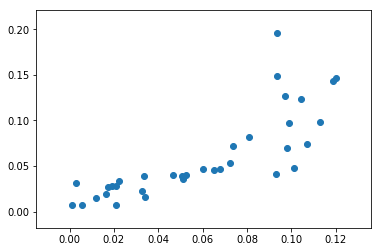

In [34]:
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X, Y_bald_eagle)
y_pred = model.predict(X)
plt.scatter(y_pred,Y_bald_eagle)

# Observations

* The large oscillations in the predicted - true plot above are due to large oscillations in the actual measured bald_eagle density, and this being a linear model'

# A polynomial fit might be more appropriate.

It looks like a polynomial fit would be useful, since there is very nonlinear behavior in the bald_eagle polulation merely as a function of year, as shown below.

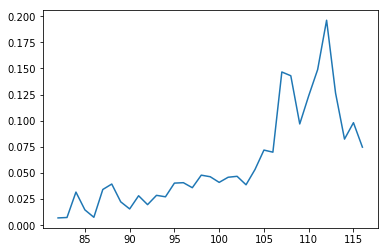

In [21]:
plt.plot(dfbald_eagle.density)

## Absolute error of Linear Model

Mean error in the bird density is 0.198.  Typical values for the bald bird density observed were on the order of 0.1 so about 10%.

In [17]:
residuals = y_pred - Y_bald_eagle
residuals = list(map(abs, residuals))
error = np.mean(residuals)
error

0.019762270870331923

## Coefficients analysis

Without scaling the data, the relative size of the coefficients just doesnt tell use much.  Lasso regression can pick out the important features.

In [35]:
linear_coefs = model.coef_
linear_coefs

array([ 0.00660433,  0.00723597, -0.01125514, -0.21508258,  1.46431567,
       -0.00538124])

# Ridge Regression

Defaults for lasso sent all the coefficients to zero, so let's try ridge regression.

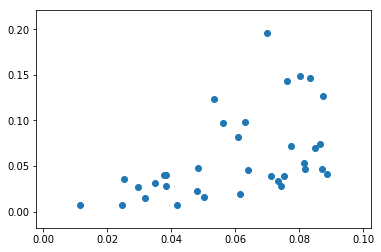

In [27]:
model = sklearn.linear_model.Ridge()
model.fit(X, Y_bald_eagle)
y_pred = model.predict(X)
plt.scatter(y_pred,Y_bald_eagle)

In [33]:
ridge_coefs = model.coef_
ridge_coefs

array([ 0.01755192,  0.00735184, -0.01461825,  0.01672408,  0.0234623 ,
       -0.00053844])

In [30]:
model

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

## Absolute error

Here with ridge regression, with defaults, the absolute error is double that of linear regression. 

In [29]:
residuals = y_pred - Y_bald_eagle
residuals = list(map(abs, residuals))
error = np.mean(residuals)
error

0.031255995209984705

## Differences in the coefficients

Ridge regression really penalized heavy_preciptation_nine_year_avg.

In [36]:
diffs = linear_coefs - ridge_coefs
diffs

array([-1.09475843e-02, -1.15864218e-04,  3.36310464e-03, -2.31806659e-01,
        1.44085337e+00, -4.84279492e-03])